# Импорт необходимых библиотек и обзор набора данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Загружаем данные

In [ ]:
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Наблюдение:
Цена дома, указанная переменной MEDV, является целевой переменной, а остальные переменные являются независимыми переменными, на основе которых мы будем прогнозировать цену дома (MEDV).

# Проверка данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Наблюдения:
Всего в каждом столбце 506 ненулевых наблюдений. Это означает, что в данных нет пропущенных значений.
В наборе данных 13 столбцов, и каждый столбец имеет числовой тип данных.

# Исследование данных и предварительная обработка

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Наблюдения:

1.) Во всех столбцах 506 записей.

2.) Среднее количество преступлений на душу населения по городам составляет 3,61%.

3.) Среднее количество комнат в жилище 6,28, наименьшее из них 3,56, а наибольшее 8,78.

4.) Средневзвешенное расстояние до 5 центров занятости Бостона составляет 3,79 мили, при этом минимальное расстояние составляет 1,12 мили, а максимальное — 12,12 мили.

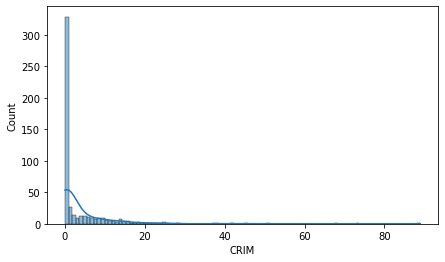

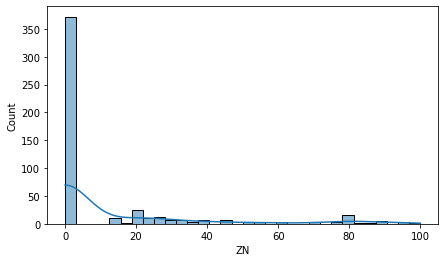

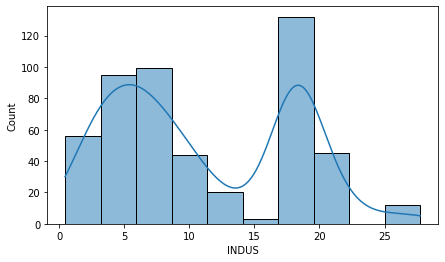

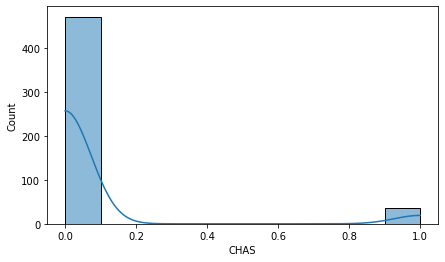

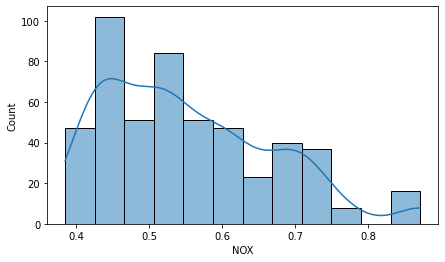

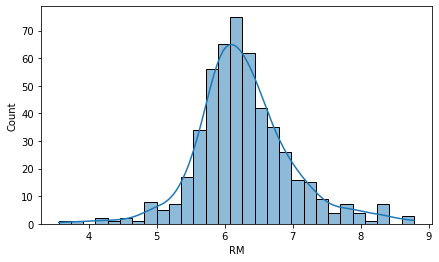

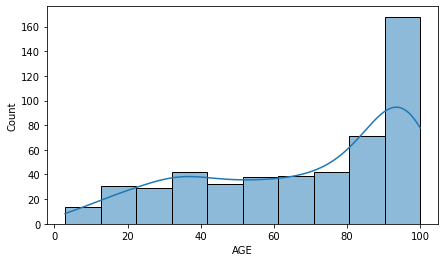

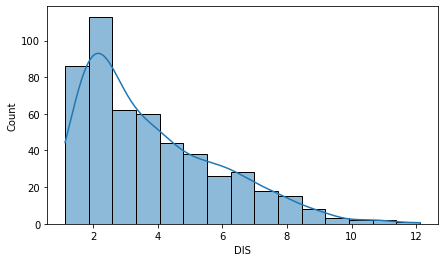

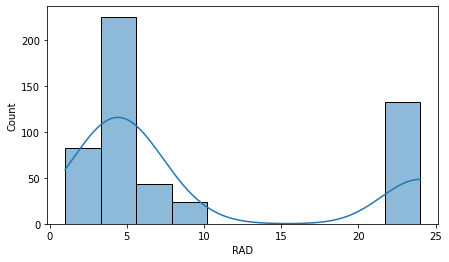

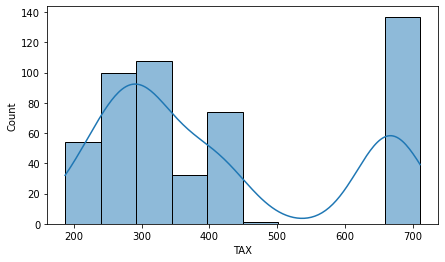

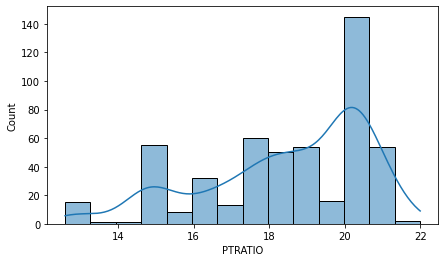

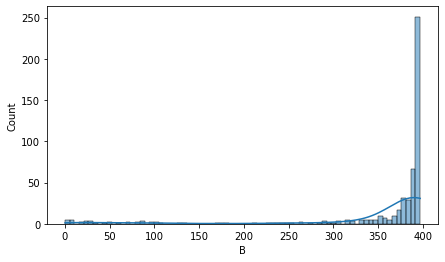

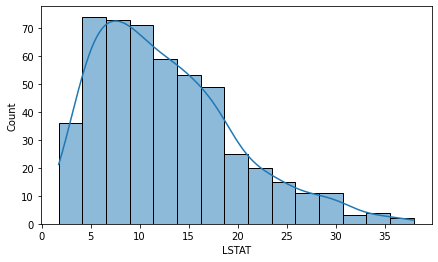

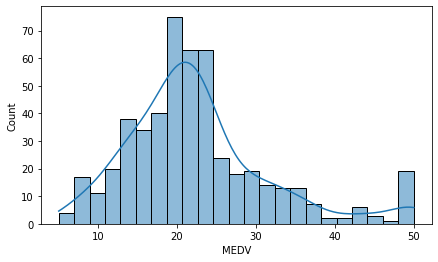

In [ ]:
# Отображение всех столбцов для просмотра их распределения
for i in df.columns:
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

Наблюдения:

1.) Положительная асимметрия возникает в распределениях Crim, ZN, Chas, NOX, Dis, RAD, TAX, LSTAT и MedV.

2.) В распределениях Age и PTTRATIO возникает отрицательная асимметрия.

3.) В распределении RM возникает нулевой перекос.

4.) В распределении INDUS также имеется небольшая положительная асимметрия.

Асимметрия представляет  собой числовое отображение степени отклонения графика распределения показателей от симметричного графика распределения.

Асимметрия симметричного распределения равно 0

Если асимметрия больше 0, то чаще в распределении встречаются значения меньше среднего. Такая асимметрия называется положительной или левосторонней.

Если асимметрия меньше 0, то в распределении чаще встречаются значения больше среднего. Такая асимметрия называется отрицательной или правосторонней.

In [ ]:
#Поскольку зависимая переменная немного искажена, 
#применим логарифмическое преобразование к столбцу «MEDV» и проверим распределение преобразованного столбца.
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

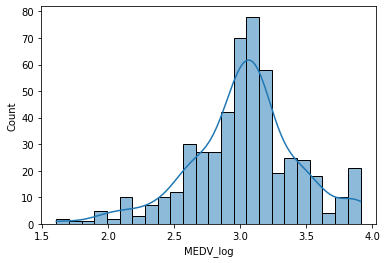

In [ ]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

Наблюдение:

Логарифмически преобразованная переменная (MEDV_log) имеет почти нормальное распределение без перекоса
Перед созданием модели линейной регрессии проверим двумерную связь между переменными. Проверим, используя тепловую карту и диаграмму рассеяния.

# Двумерный анализ

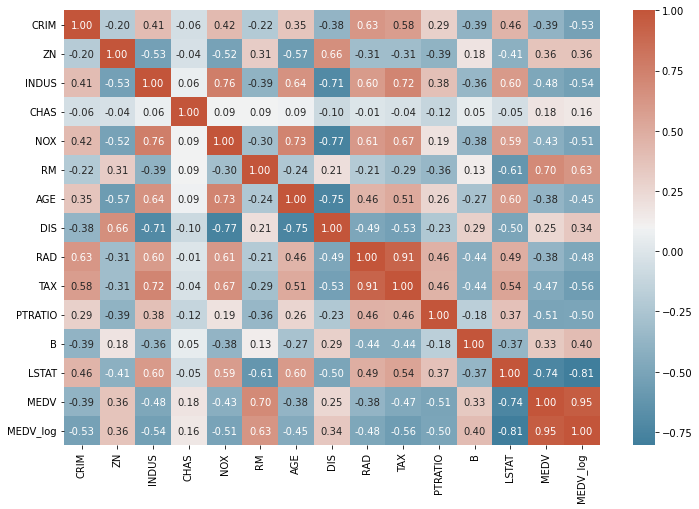

In [ ]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)
plt.show()

Наблюдения:

1.) Существует множество высоких корреляций выше 0,7 и ниже -0,7, в том числе: TAX & INDUS, AGE & NOX, MEDV & RM, NOX & INDUS, RAD & INDUS, DIS & INDUS, NOX & DIS, DIS & AGE, и LSTAT и MEDV_log.

Теперь визуализируем отношения между парами признаков, имеющих значительную корреляцию.

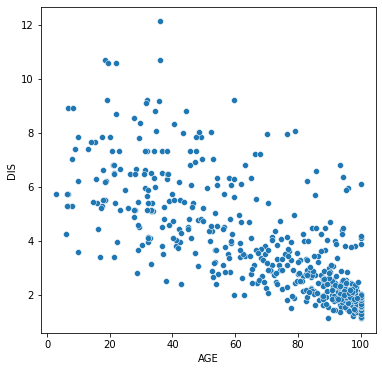

In [ ]:
# Диаграмма рассеяния для визуализации взаимосвязи между AGE и DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

Наблюдения:

Расстояние от домов до центров занятости Бостона умеренно уменьшается по мере увеличения доли старых домов в городе. Возможно, что центры занятости Бостона расположены в городах, где доля домов, построенных до 1940 года, сравнительно высока.

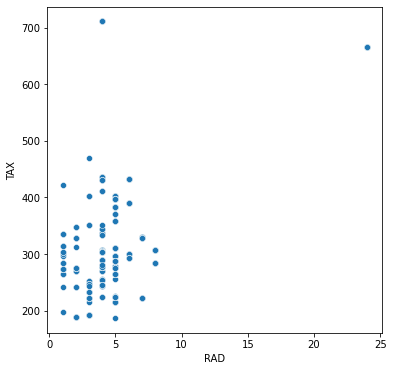

In [ ]:
#Точечная диаграмма для визуализации взаимосвязи между RAD и Tax

plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

Наблюдения:

Корреляция между RAD и TAX очень высока. Однако между этими двумя переменными не прослеживается никакой тенденции.
Сильная корреляция может быть вызвана выбросами.

Проверим корреляцию после удаления выбросов.

In [ ]:
# Удалим данные, соответствующие высокой TAX
df1 = df[df['TAX'] < 600]

# Пересчитываем корреляцию
print('Корреляция между TAX и RAD равна', pearsonr(df1['TAX'], df1['RAD'])[0])

Корреляция между TAX и RAD равна 0.249757313314292


Наблюдение:

Таким образом, высокая корреляция между TAX и RAD обусловлена выбросами. TAX для некоторых объектов может быть выше по другой причине.

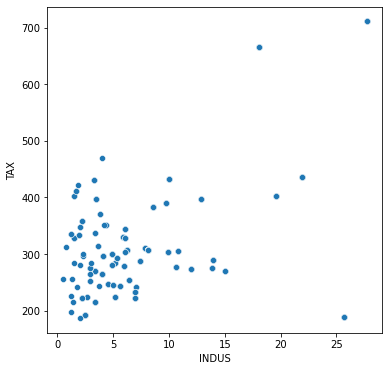

In [ ]:
# # Диаграмма рассеяния для визуализации взаимосвязи между INDUS и TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

Наблюдения:

TAX увеличивается с увеличением доли земельной доли неторгового бизнеса в городе. Это может быть связано с тем, что переменные TAX и INDUS связаны с третьей переменной.

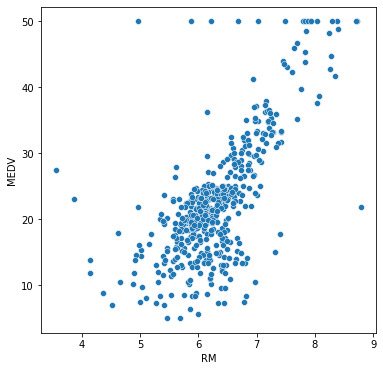

In [ ]:
# Диаграмма рассеяния для визуализации взаимосвязи между RM и MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

Наблюдения:

Цена дома увеличивается по мере увеличения стоимости RM. Это ожидаемо, так как цена обычно выше для большего количества комнат.

На горизонтальной линии есть несколько отклонений, так как значение MEDV, ограничено на уровне 50.

# Напишем код для создания модели линейной регрессии и выведем сводку модели.

Используем модель sm.OLS() на обучающих данных

In [ ]:
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

X_train = X_train.drop(['TAX'], axis=1)

y = y_train
x = X_train
sm.add_constant(X)
model1 = sm.OLS(y, x).fit()

print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     95.56
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          2.97e-101
Time:                        17:49:17   Log-Likelihood:                 78.262
No. Observations:                 354   AIC:                            -130.5
Df Residuals:                     341   BIC:                            -80.22
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4999      0.253     17.767      0.0

Наблюдения:
В колонке P (>|t|) мы видим, что CRIM, CHAS, NOX, RM, DIS, RAD, PTRATIO и LSTAT статистически значимы, а ZN, INDUS и AGE статистически не значимы.